In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import os
import cv2
import time
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import zipfile
import os

zip_file_path = '/content/Training Data.zip'
extracted_folder_path = '/content/Training_Data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['Training Data', 'Validation Data']


In [4]:
import zipfile
import os

zip_file_path = "/content/Validation Data.zip"

extracted_folder_path = '/content/Training_Data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['Training Data', 'Validation Data']


In [5]:
import os

def count_images_in_folders(directory):
    folder_counts = {}

    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)

        if os.path.isdir(folder_path):
            # Count the number of files in the folder
            num_files = len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])
            folder_counts[folder_name] = num_files

    return folder_counts

train_dir = "/content/Training_Data/Training Data"
val_dir = "/content/Training_Data/Validation Data"

train_dict = count_images_in_folders(train_dir)
val_dict = count_images_in_folders(val_dir)

print("Train Dictionary:",train_dict)

print("Validation Dictionary:",val_dict)


Train Dictionary: {'38': 6, '27': 7, '36': 6, '22': 7, '31': 7, '33': 7, '2': 10, '8': 9, '25': 6, '29': 7, '9': 9, '20': 7, '7': 9, '13': 8, '34': 7, '40': 6, '21': 7, '12': 9, '23': 7, '14': 8, '30': 7, '5': 8, '4': 8, '39': 6, '3': 10, '35': 6, '6': 9, '32': 7, '1': 14, '19': 7, '17': 8, '18': 8, '37': 5, '16': 8, '15': 8, '10': 8, '26': 7, '24': 7, '11': 9, '28': 7}
Validation Dictionary: {'45': 6, '48': 6, '57': 5, '54': 6, '49': 5, '41': 6, '52': 5, '56': 6, '43': 5, '47': 6, '59': 6, '60': 5, '53': 6, '46': 6, '50': 6, '44': 6, '51': 5, '42': 6, '58': 6, '55': 5}


# triples

In [6]:
import os
import random

def create_triplets(directory, folder_list, max_files=10, file_extension=".png"):
    triplets = []
    folders = list(folder_list.keys())

    for folder in folders:
        path = os.path.join(directory, folder)
        files = [f for f in os.listdir(path) if f.endswith(file_extension)][:max_files]
        num_files = len(files)

        for i in range(num_files-1):
            for j in range(i+1, num_files):
                anchor = (folder, f"{files[i]}")
                positive = (folder, f"{files[j]}")

                neg_folder = folder
                while neg_folder == folder:
                    neg_folder = random.choice(folders)
                neg_files = [f for f in os.listdir(os.path.join(directory, neg_folder)) if f.endswith(file_extension)]
                neg_file = random.choice(neg_files)
                negative = (neg_folder, f"{neg_file}")

                triplets.append((anchor, positive, negative))

    random.shuffle(triplets)
    return triplets

# Assuming train_dir, train_dict, val_dir, and val_dict are defined
train_triplet = create_triplets(train_dir, train_dict)
test_triplet = create_triplets(val_dir, val_dict)

print("Number of training triplets:", len(train_triplet))
print("Number of testing triplets:", len(test_triplet))

print("\nExamples of triplets:")
for i in range(5):
    print(train_triplet[i])


Number of training triplets: 1018
Number of testing triplets: 265

Examples of triplets:
(('9', 'web9.png'), ('9', 'web8.png'), ('13', 'web5.png'))
(('6', 'web6.png'), ('6', 'web7.png'), ('18', 'web6.png'))
(('29', 'web1.png'), ('29', 'web7.png'), ('20', 'web4.png'))
(('6', 'web6.png'), ('6', 'web2.png'), ('25', 'web1.png'))
(('3', 'web1.png'), ('3', 'web3.png'), ('22', 'web6.png'))


In [ ]:
"""def read_image2(index):
    path = os.path.join(train_dir, index[0], "web"+str(int(index[1][0])+1)
#                         + index[1][1:]
                       +".png")"""

# batch generator

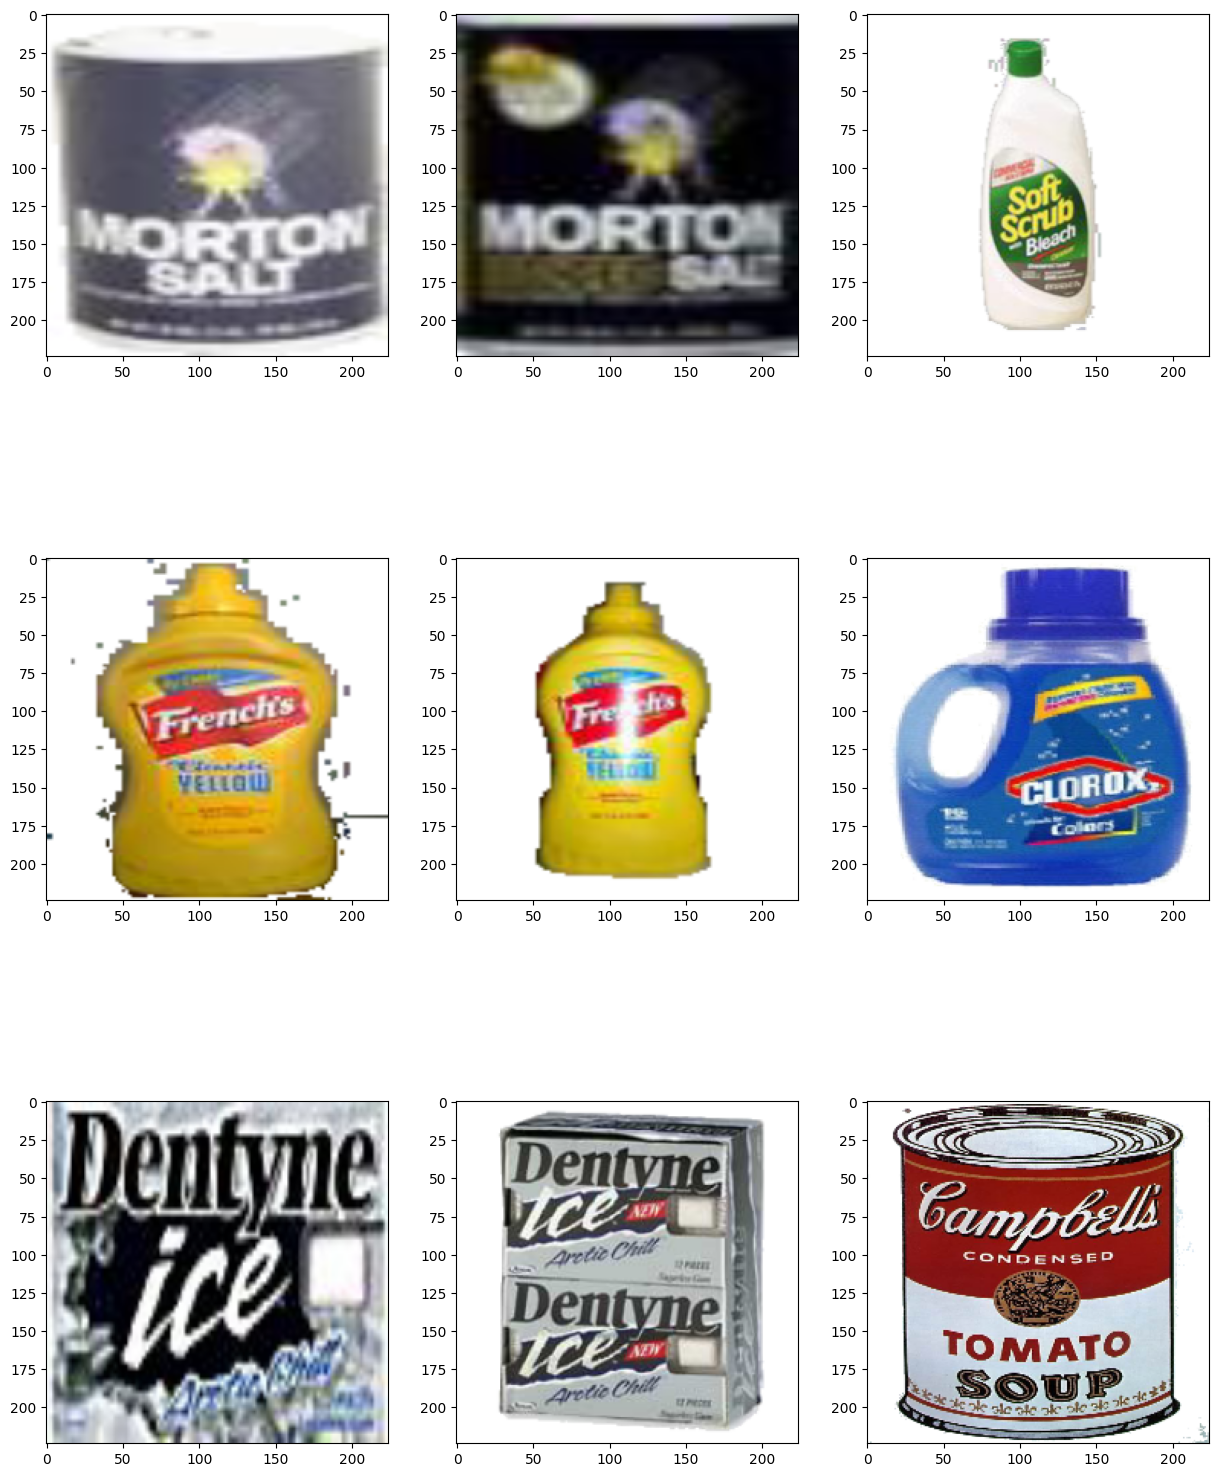

In [7]:
################for train
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt


ROOT    = "/content/Training_Data/Training Data"
#val_dir = "/kaggle/input/reco-part2/Product Recoginition/Validation Data"


def read_image(index , target_size=(224, 224)):
    path  = os.path.join(ROOT, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)  # Resize the image
    return image

def get_batch(triplet_list, batch_size=256, preprocess=True):
    batch_steps = len(triplet_list)//batch_size

    for i in range(batch_steps + 1):
        anchor   = []
        positive = []
        negative = []

        j = i * batch_size
        while j < (i + 1) * batch_size and j < len(triplet_list):
            a, p, n = triplet_list[j]
            anchor_img   = read_image(a)
            positive_img = read_image(p)
            negative_img = read_image(n)

            if anchor_img is not None and positive_img is not None and negative_img is not None:
                anchor.append(anchor_img)
                positive.append(positive_img)
                negative.append(negative_img)

            j += 1

        anchor   = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)

        if preprocess:
            anchor   = preprocess_input(anchor)
            positive = preprocess_input(positive)
            negative = preprocess_input(negative)

        yield ([anchor, positive, negative])

num_plots = 3

f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

for x in get_batch(train_triplet, batch_size=num_plots, preprocess=False):
    a, p, n = x
    for i in range(num_plots):
        axes[i, 0].imshow(a[i])
        axes[i, 1].imshow(p[i])
        axes[i, 2].imshow(n[i])
        i += 1
    break


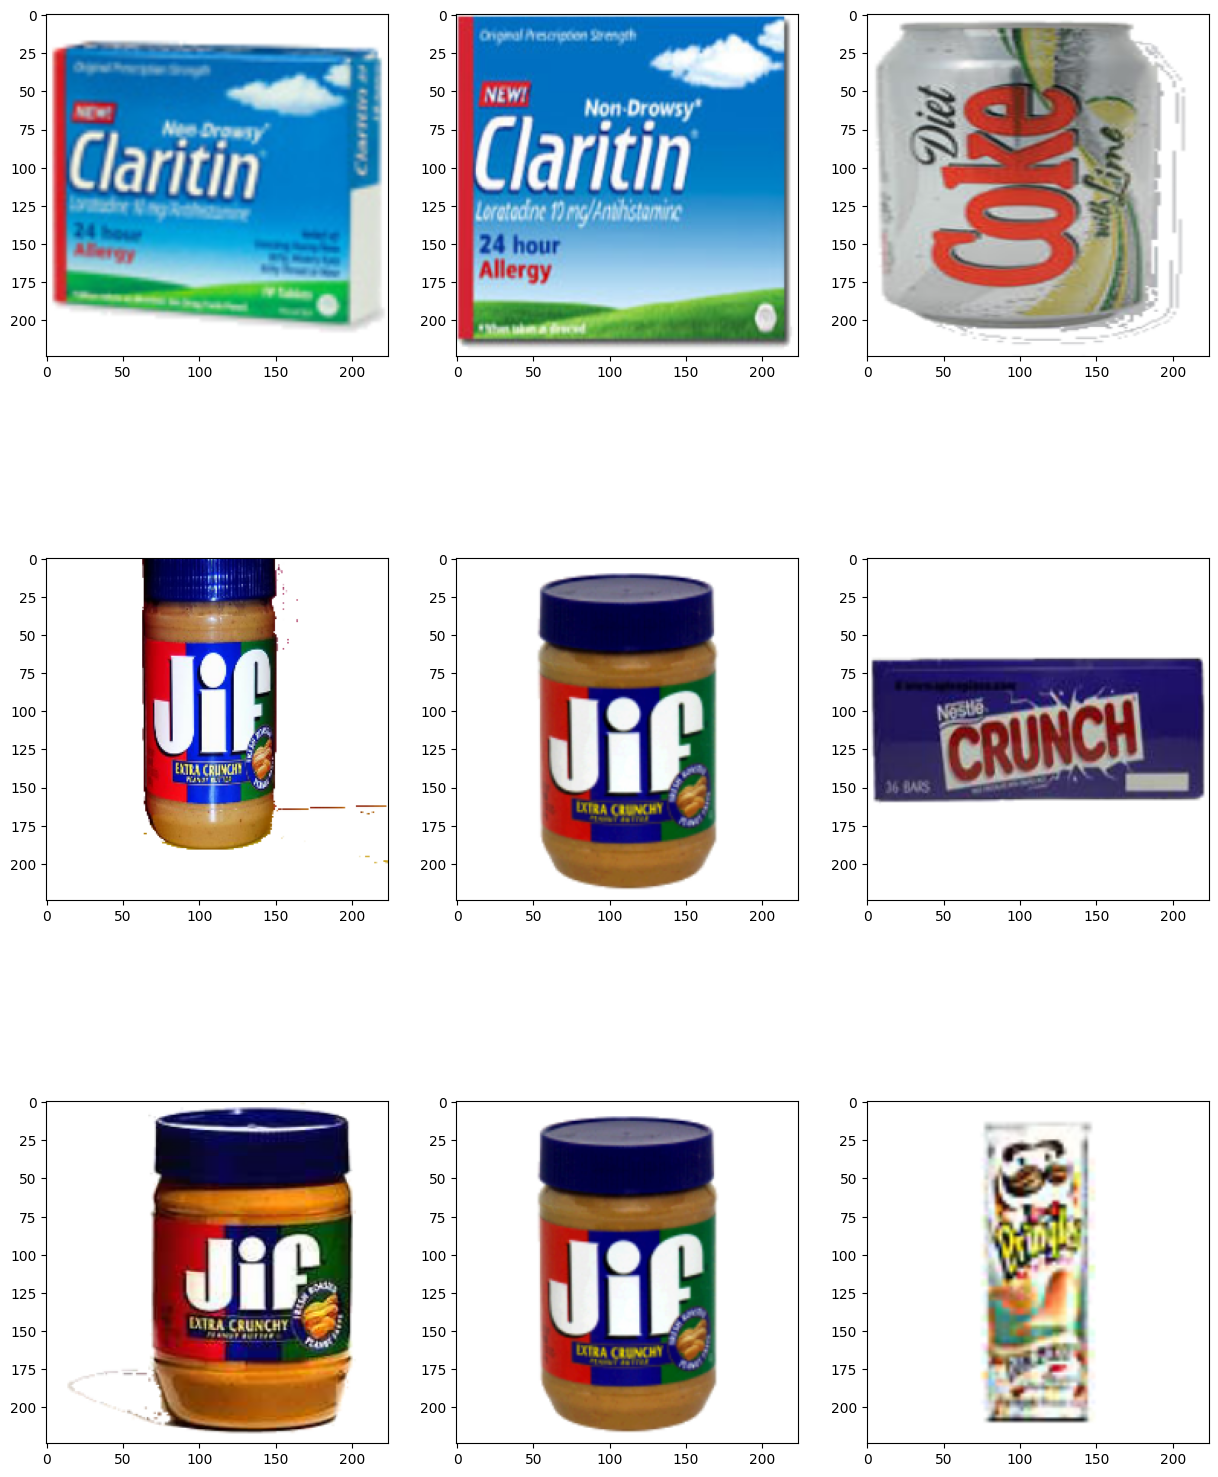

In [8]:
################for test

import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt


root = "/content/Training_Data/Validation Data"


def read_image1(index , target_size=(224, 224)):
    path  = os.path.join(root, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)  # Resize the image
    return image

def get_batch_test(triplet_list, batch_size=256, preprocess=True):
    batch_steps = len(triplet_list)//batch_size

    for i in range(batch_steps + 1):
        anchor   = []
        positive = []
        negative = []

        j = i * batch_size
        while j < (i + 1) * batch_size and j < len(triplet_list):
            a, p, n = triplet_list[j]
            anchor_img   = read_image1(a)
            positive_img = read_image1(p)
            negative_img = read_image1(n)

            if anchor_img is not None and positive_img is not None and negative_img is not None:
                anchor.append(anchor_img)
                positive.append(positive_img)
                negative.append(negative_img)

            j += 1

        anchor   = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)

        if preprocess:
            anchor   = preprocess_input(anchor)
            positive = preprocess_input(positive)
            negative = preprocess_input(negative)

        yield ([anchor, positive, negative])

num_plots = 3

f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

for x in get_batch_test(test_triplet, batch_size=num_plots, preprocess=False):
    a, p, n = x
    for i in range(num_plots):
        axes[i, 0].imshow(a[i])
        axes[i, 1].imshow(p[i])
        axes[i, 2].imshow(n[i])
        i += 1
    break


# #create model

In [9]:
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
def get_encoder(input_shape):  #get feature vector
    """ Returns the image encoding model """

    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )

    for i in range(len(pretrained_model.layers)-27):
        pretrained_model.layers[i].trainable = False

    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Encode_Model")
    return encode_model

In [11]:
class DistanceLayer(layers.Layer):
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


def get_siamese_network(input_shape = (224, 224, 3)):
    encoder = get_encoder(input_shape)

    # Input Layers for the images
    anchor_input   = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")

    ## Generate the encodings (feature vectors) for the images
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)

    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    distances = DistanceLayer()(
        encoder(anchor_input),
        encoder(positive_input),
        encoder(negative_input)
    )

    # Creating the Model
    siamese_network = Model(
        inputs  = [anchor_input, positive_input, negative_input],
        outputs = distances,
        name = "Siamese_Network"
    )
    return siamese_network

siamese_network = get_siamese_network()
siamese_network.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "Siamese_Network"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Anchor_Input (InputLayer)   [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Positive_Input (InputLayer  [(None, 224, 224, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 Negative_Input (InputLayer  [(None, 224, 224, 3)]        0         []                            
 )                                                                                                
                   

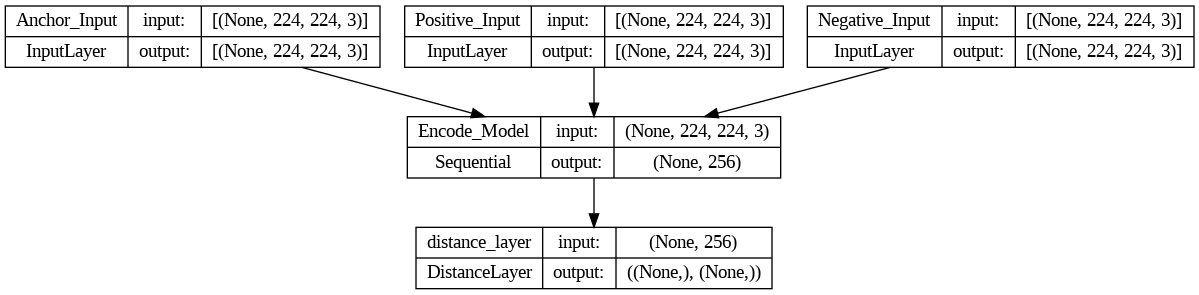

In [12]:
plot_model(siamese_network, show_shapes=True, show_layer_names=True)


In [13]:
class SiameseModel(Model):
    # Builds a Siamese model based on a base-model
    def __init__(self, siamese_network, margin=1.0):
        super(SiameseModel, self).__init__()

        self.margin = margin
        self.siamese_network = siamese_network
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape get the gradients when we compute loss, and uses them to update the weights
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))

        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # Get the two distances from the network, then compute the triplet loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics so the reset_states() can be called automatically.
        return [self.loss_tracker]

In [14]:
siamese_model = SiameseModel(siamese_network)

optimizer = Adam(learning_rate=1e-3, epsilon=1e-01)
siamese_model.compile(optimizer=optimizer)

In [15]:
def test_on_triplets(batch_size = 256):
    pos_scores, neg_scores = [], []

    for data in get_batch_test(test_triplet, batch_size=batch_size):
        prediction = siamese_model.predict(data)
        pos_scores += list(prediction[0])
        neg_scores += list(prediction[1])

    accuracy = np.sum(np.array(pos_scores) < np.array(neg_scores)) / len(pos_scores)
    ap_mean = np.mean(pos_scores)
    an_mean = np.mean(neg_scores)
    ap_stds = np.std(pos_scores)
    an_stds = np.std(neg_scores)

    print(f"Accuracy on test = {accuracy:.5f}")
    return (accuracy, ap_mean, an_mean, ap_stds, an_stds)

In [16]:
import warnings

# Suppress libpng warnings
warnings.filterwarnings("ignore", category=UserWarning, module="PIL.PngImagePlugin")


In [18]:
save_all = False
epochs = 1
batch_size = 128

max_acc = 0
train_loss = []
test_metrics = []

start_time_training = time.time()

for epoch in range(1, epochs+1):
    t = time.time()

    # Training the model on train data
    epoch_loss = []

    for data in get_batch(train_triplet, batch_size=batch_size):
        loss = siamese_model.train_on_batch(data)
        epoch_loss.append(loss)
    epoch_loss = sum(epoch_loss)/len(epoch_loss)
    train_loss.append(epoch_loss)

    print(f"\nEPOCH: {epoch} \t (Epoch done in {int(time.time()-t)} sec)")
    print(f"Loss on train    = {epoch_loss:.5f}")

    # Testing the model on test data
    start_time_testing = time.time()

    metric = test_on_triplets(batch_size=batch_size)
    test_metrics.append(metric)
    accuracy = metric[0]

    end_time_testing = time.time()
    total_time_testing = end_time_testing - start_time_testing

    # Saving the model weights
    if save_all or accuracy>=max_acc:
        siamese_model.save_weights("siamese_model_weights.h5")
        max_acc = accuracy


end_time_training = time.time()
total_time_training = end_time_training - start_time_training


# Saving the model after all epochs run
siamese_model.save("siamese_model_final", save_format="tf")


print(f"\nTotal Training Time: {total_time_training} seconds")

print(f"Total Testing Time: {total_time_testing} seconds")



EPOCH: 1 	 (Epoch done in 1067 sec)
Loss on train    = 0.09675
1/1 [==============================] - 4s 4s/step
Accuracy on test = 0.95472



Total Training Time: 1223.4393074512482 seconds
Total Testing Time: 155.53776097297668 seconds


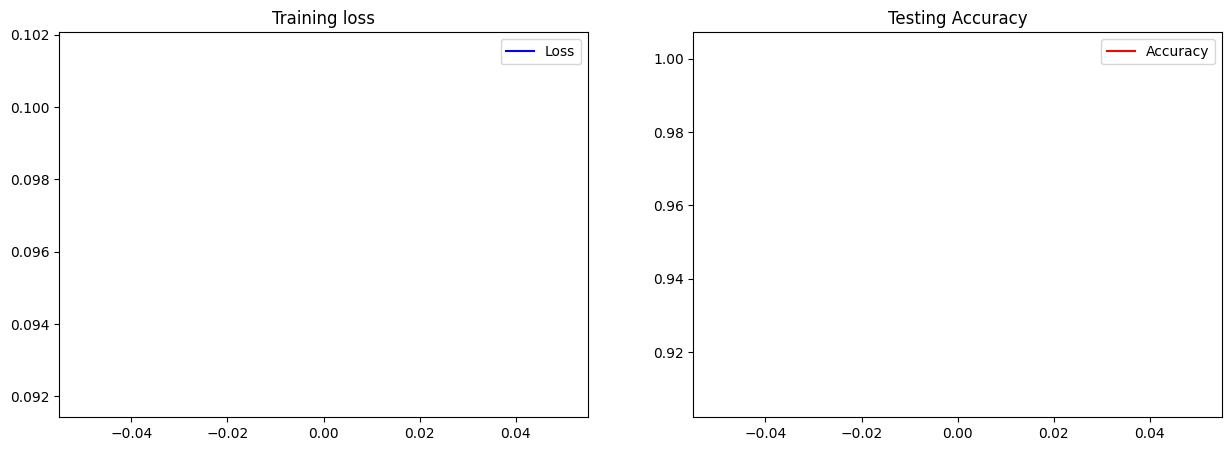

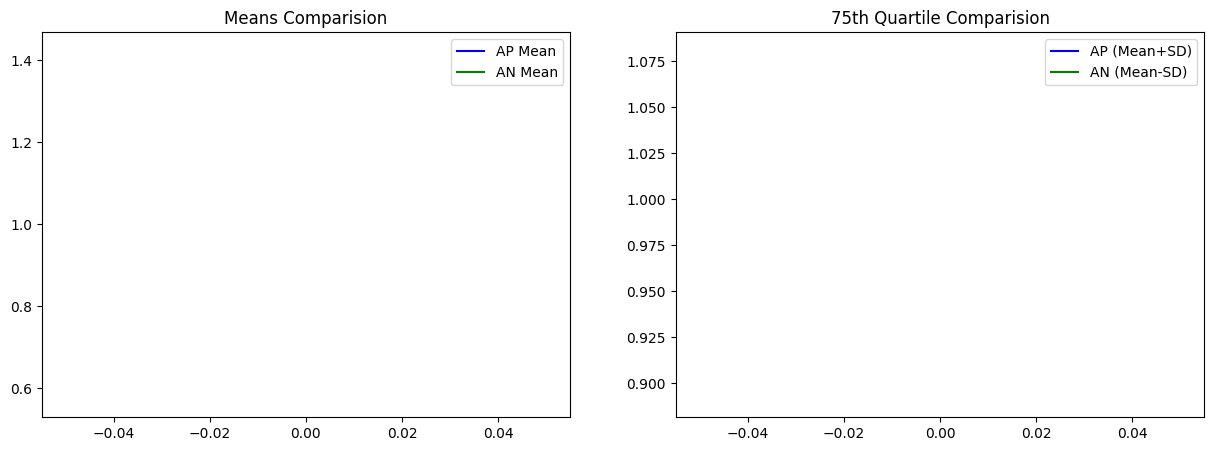

In [30]:
def plot_metrics(loss, metrics):
    # Extracting individual metrics from metrics
    accuracy = metrics[:, 0]
    ap_mean  = metrics[:, 1]
    an_mean  = metrics[:, 2]
    ap_stds  = metrics[:, 3]
    an_stds  = metrics[:, 4]

    plt.figure(figsize=(15,5))

    # Plotting the loss over epochs
    plt.subplot(121)
    plt.plot(loss, 'b', label='Loss')
    plt.title('Training loss')
    plt.legend()

    # Plotting the accuracy over epochs
    plt.subplot(122)
    plt.plot(accuracy, 'r', label='Accuracy')
    plt.title('Testing Accuracy')


    plt.legend()

    plt.figure(figsize=(15,5))

    # Comparing the Means over epochs
    plt.subplot(121)
    plt.plot(ap_mean, 'b', label='AP Mean')
    plt.plot(an_mean, 'g', label='AN Mean')
    plt.title('Means Comparision')
    plt.legend()

    # Plotting the accuracy
    ap_75quartile = (ap_mean+ap_stds)
    an_75quartile = (an_mean-an_stds)
    plt.subplot(122)
    plt.plot(ap_75quartile, 'b', label='AP (Mean+SD)')
    plt.plot(an_75quartile, 'g', label='AN (Mean-SD)')
    plt.title('75th Quartile Comparision')
    plt.legend()

test_metrics = np.array(test_metrics)
plot_metrics(train_loss, test_metrics)


In [22]:
def extract_encoder(model):
    encoder = get_encoder((224, 224, 3))
    i=0
    for e_layer in model.layers[0].layers[3].layers:
        layer_weight = e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder

encoder = extract_encoder(siamese_model)
encoder.save_weights("encoder")
encoder.summary()


Model: "Encode_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 lambda_1 (Lambda)           (None, 256)               0         
                                                      

In [24]:
def classify_images(face_list1, face_list2, threshold=1.3):
    # Getting the encodings for the passed faces
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)

    distance = np.sum(np.square(tensor1-tensor2), axis=-1)
    prediction = np.where(distance<=threshold, 0, 1)
    return prediction

8/8 [==============================] - 46s 6s/step

Accuracy of model: 0.8046875



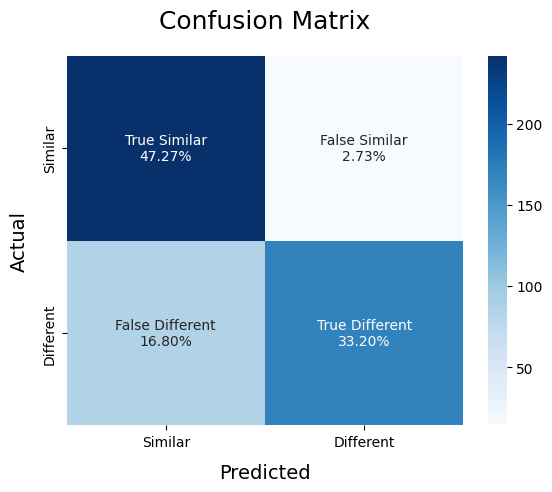

In [25]:
def ModelMetrics(pos_list, neg_list):
    true = np.array([0]*len(pos_list)+[1]*len(neg_list))
    pred = np.append(pos_list, neg_list)

    # Compute and print the accuracy
    print(f"\nAccuracy of model: {accuracy_score(true, pred)}\n")

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(true, pred)

    categories  = ['Similar','Different']
    names = ['True Similar','False Similar', 'False Different','True Different']
    percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


pos_list = np.array([])
neg_list = np.array([])

for data in get_batch_test(test_triplet, batch_size=256):
    a, p, n = data
    pos_list = np.append(pos_list, classify_images(a, p))
    neg_list = np.append(neg_list, classify_images(a, n))
    break

ModelMetrics(pos_list, neg_list)


In [26]:
model = tf.keras.models.load_model("siamese_model_final")


In [28]:
import zipfile
import os

zip_file_path = '/content/Test Samples Recognition.zip'
extracted_folder_path = '/content/Training_Data'  # Provide the path where you want to extract the contents

# Create the target directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Now you can read the contents of the extracted folder
# For example, list all files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['Training Data', 'Test Samples Recognition', 'Validation Data']


In [31]:
import zipfile
import os

zip_file_path = '/content/One Shot Recognition.zip'
extracted_folder_path = '/content/Training_Data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['Training Data', 'One Shot Recognition', 'Test Samples Recognition', 'Validation Data']


In [33]:
import zipfile
import os

zip_file_path = '/content/anchor.zip'
extracted_folder_path = '/content/Training_Data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['Training Data', 'One Shot Recognition', 'Test Samples Recognition', 'Validation Data', 'anchor']


In [32]:
#one shot

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# model = load_model('E:/cv/siames_30/siamese_model_weights.h5')

# model = tf.keras.models.load_model("siamese_model_final")



test_dir = '/content/Training_Data/One Shot Recognition'
reference_dir = '/content/Training_Data/Training Data'
reference_images = {}

correct_predictions = 0
total_predictions = 0
class_count = 0

for class_dir in os.listdir(reference_dir):
    class_path = os.path.join(reference_dir, class_dir)
    if os.path.isdir(class_path):
        class_count += 1

        for img_filename in os.listdir(class_path):
            reference_image_path = os.path.join(class_path, img_filename)
            reference_img = image.load_img(reference_image_path, target_size=(224, 224))
            reference_img_array = image.img_to_array(reference_img)
            reference_img_array = np.expand_dims(reference_img_array, axis=0)
            reference_img_array = preprocess_input(reference_img_array)
            reference_images[img_filename] = (class_dir, reference_img_array)
print(f'Total number of classes in {reference_dir}: {class_count}')


class_accuracies = {}

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)

    if os.path.isdir(class_path):
        class_correct_predictions = 0
        class_total_predictions = 0

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            if os.path.exists(img_path):
                test_img = image.load_img(img_path, target_size=(224, 224))
                test_img_array = image.img_to_array(test_img)
                test_img_array = np.expand_dims(test_img_array, axis=0)
                test_img_array = preprocess_input(test_img_array)

                similarities = {}
                for ref_filename, (ref_class, reference_img_array) in reference_images.items():
                    similarity_score = cosine_similarity(test_img_array.reshape(1, -1),
                                                          reference_img_array.reshape(1, -1))
                    similarities[ref_class] = (ref_class, similarity_score[0][0])

                most_similar_class, _ = max(similarities.items(), key=lambda x: x[1][1])
                predicted_class = similarities[most_similar_class][0]

                print(
                    f'Test image {filename} in class {class_name} belongs to class {predicted_class} (Similarity: {similarities[most_similar_class][1]:.4f})')

                class_total_predictions += 1
                if predicted_class == class_name:
                    class_correct_predictions += 1

                total_predictions += 1
                if predicted_class == class_name:
                    correct_predictions += 1

            else:
                print(f'Test image {filename} in class {class_name} not found.')

        class_accuracy = class_correct_predictions / class_total_predictions if class_total_predictions > 0 else 0
        class_accuracies[class_name] = class_accuracy
        print(f'Class {class_name} Accuracy: {class_accuracy:.2%} ({class_correct_predictions}/{class_total_predictions} correct predictions)')
        print()


accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f'Overall Accuracy: {accuracy:.2%} ({correct_predictions}/{total_predictions} correct predictions)')


print('\nClass-wise Accuracies:')
for class_name, class_accuracy in class_accuracies.items():
    print(f'Class {class_name}: {class_accuracy:.2%}')


Total number of classes in /content/Training_Data/Training Data: 40
Overall Accuracy: 0.00% (0/0 correct predictions)

Class-wise Accuracies:


In [29]:
#test sample

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# model = load_model('E:/cv/siames_30/siamese_model_weights.h5')

# model = tf.keras.models.load_model("siamese_model_final")



test_dir = '/content/Training_Data/Test Samples Recognition'
reference_dir = '/content/Training_Data/Training Data'
reference_images = {}

correct_predictions = 0
total_predictions = 0
class_count = 0

for class_dir in os.listdir(reference_dir):
    class_path = os.path.join(reference_dir, class_dir)
    if os.path.isdir(class_path):
        class_count += 1

        for img_filename in os.listdir(class_path):
            reference_image_path = os.path.join(class_path, img_filename)
            reference_img = image.load_img(reference_image_path, target_size=(224, 224))
            reference_img_array = image.img_to_array(reference_img)
            reference_img_array = np.expand_dims(reference_img_array, axis=0)
            reference_img_array = preprocess_input(reference_img_array)
            reference_images[img_filename] = (class_dir, reference_img_array)
print(f'Total number of classes in {reference_dir}: {class_count}')


class_accuracies = {}

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)

    if os.path.isdir(class_path):
        class_correct_predictions = 0
        class_total_predictions = 0

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            if os.path.exists(img_path):
                test_img = image.load_img(img_path, target_size=(224, 224))
                test_img_array = image.img_to_array(test_img)
                test_img_array = np.expand_dims(test_img_array, axis=0)
                test_img_array = preprocess_input(test_img_array)

                similarities = {}
                for ref_filename, (ref_class, reference_img_array) in reference_images.items():
                    similarity_score = cosine_similarity(test_img_array.reshape(1, -1),
                                                          reference_img_array.reshape(1, -1))
                    similarities[ref_class] = (ref_class, similarity_score[0][0])

                most_similar_class, _ = max(similarities.items(), key=lambda x: x[1][1])
                predicted_class = similarities[most_similar_class][0]

                print(
                    f'Test image {filename} in class {class_name} belongs to class {predicted_class} (Similarity: {similarities[most_similar_class][1]:.4f})')

                class_total_predictions += 1
                if predicted_class == class_name:
                    class_correct_predictions += 1

                total_predictions += 1
                if predicted_class == class_name:
                    correct_predictions += 1

            else:
                print(f'Test image {filename} in class {class_name} not found.')

        class_accuracy = class_correct_predictions / class_total_predictions if class_total_predictions > 0 else 0
        class_accuracies[class_name] = class_accuracy
        print(f'Class {class_name} Accuracy: {class_accuracy:.2%} ({class_correct_predictions}/{class_total_predictions} correct predictions)')
        print()


accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f'Overall Accuracy: {accuracy:.2%} ({correct_predictions}/{total_predictions} correct predictions)')


print('\nClass-wise Accuracies:')
for class_name, class_accuracy in class_accuracies.items():
    print(f'Class {class_name}: {class_accuracy:.2%}')


Total number of classes in /content/Training_Data/Training Data: 40
Test image 2.png in class 38 belongs to class 28 (Similarity: 0.3388)
Test image 1.png in class 38 belongs to class 28 (Similarity: 0.7137)
Class 38 Accuracy: 0.00% (0/2 correct predictions)

Test image 3.png in class 31 belongs to class 28 (Similarity: 0.7396)
Test image 2.png in class 31 belongs to class 28 (Similarity: 0.3739)
Test image 5.png in class 31 belongs to class 11 (Similarity: 0.0495)
Test image 4.png in class 31 belongs to class 11 (Similarity: 0.0029)
Test image 6.png in class 31 belongs to class 1 (Similarity: 0.2522)
Test image 1.png in class 31 belongs to class 11 (Similarity: 0.1377)
Class 31 Accuracy: 0.00% (0/6 correct predictions)

Test image 3.png in class 33 belongs to class 11 (Similarity: 0.2047)
Test image 2.png in class 33 belongs to class 1 (Similarity: 0.2670)
Test image 5.png in class 33 belongs to class 11 (Similarity: 0.0654)
Test image 4.png in class 33 belongs to class 11 (Similarity

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test image 2.png in class 1 belongs to class 1 (Similarity: 0.1155)
Test image 4.png in class 1 belongs to class 1 (Similarity: 0.3835)
Test image 1.png in class 1 belongs to class 1 (Similarity: 0.5446)
Class 1 Accuracy: 75.00% (3/4 correct predictions)

Test image 3.png in class 16 belongs to class 28 (Similarity: 0.4906)
Test image 2.png in class 16 belongs to class 11 (Similarity: -0.0240)
Test image 5.png in class 16 belongs to class 28 (Similarity: 0.5393)
Test image 4.png in class 16 belongs to class 11 (Similarity: -0.1532)
Test image 1.png in class 16 belongs to class 11 (Similarity: 0.1509)
Class 16 Accuracy: 0.00% (0/5 correct predictions)

Test image 3.png in class 15 belongs to class 11 (Similarity: 0.1235)
Test image 2.png in class 15 belongs to class 28 (Similarity: 0.6907)
Test image 5.png in class 15 belongs to class 28 (Similarity: 0.5547)
Test image 4.png in class 15 belongs to class 1 (Similarity: 0.1695)
Test image 6.png in class 15 belongs to class 11 (Similarity:

In [34]:
#test sample

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# model = load_model('E:/cv/siames_30/siamese_model_weights.h5')

# model = tf.keras.models.load_model("siamese_model_final")



test_dir = '/content/Training_Data/anchor'
reference_dir = '/content/Training_Data/One Shot Recognition'
reference_images = {}

correct_predictions = 0
total_predictions = 0
class_count = 0

for class_dir in os.listdir(reference_dir):
    class_path = os.path.join(reference_dir, class_dir)
    if os.path.isdir(class_path):
        class_count += 1

        for img_filename in os.listdir(class_path):
            reference_image_path = os.path.join(class_path, img_filename)
            reference_img = image.load_img(reference_image_path, target_size=(224, 224))
            reference_img_array = image.img_to_array(reference_img)
            reference_img_array = np.expand_dims(reference_img_array, axis=0)
            reference_img_array = preprocess_input(reference_img_array)
            reference_images[img_filename] = (class_dir, reference_img_array)
print(f'Total number of classes in {reference_dir}: {class_count}')


class_accuracies = {}

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)

    if os.path.isdir(class_path):
        class_correct_predictions = 0
        class_total_predictions = 0

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            if os.path.exists(img_path):
                test_img = image.load_img(img_path, target_size=(224, 224))
                test_img_array = image.img_to_array(test_img)
                test_img_array = np.expand_dims(test_img_array, axis=0)
                test_img_array = preprocess_input(test_img_array)

                similarities = {}
                for ref_filename, (ref_class, reference_img_array) in reference_images.items():
                    similarity_score = cosine_similarity(test_img_array.reshape(1, -1),
                                                          reference_img_array.reshape(1, -1))
                    similarities[ref_class] = (ref_class, similarity_score[0][0])

                most_similar_class, _ = max(similarities.items(), key=lambda x: x[1][1])
                predicted_class = similarities[most_similar_class][0]

                print(
                    f'Test image {filename} in class {class_name} belongs to class {predicted_class} (Similarity: {similarities[most_similar_class][1]:.4f})')

                class_total_predictions += 1
                if predicted_class == class_name:
                    class_correct_predictions += 1

                total_predictions += 1
                if predicted_class == class_name:
                    correct_predictions += 1

            else:
                print(f'Test image {filename} in class {class_name} not found.')

        class_accuracy = class_correct_predictions / class_total_predictions if class_total_predictions > 0 else 0
        class_accuracies[class_name] = class_accuracy
        print(f'Class {class_name} Accuracy: {class_accuracy:.2%} ({class_correct_predictions}/{class_total_predictions} correct predictions)')
        print()


accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f'Overall Accuracy: {accuracy:.2%} ({correct_predictions}/{total_predictions} correct predictions)')


print('\nClass-wise Accuracies:')
for class_name, class_accuracy in class_accuracies.items():
    print(f'Class {class_name}: {class_accuracy:.2%}')


Total number of classes in /content/Training_Data/One Shot Recognition: 1
Overall Accuracy: 0.00% (0/0 correct predictions)

Class-wise Accuracies:
